In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mp
import seaborn as sns

In [9]:
dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [10]:
d1=pd.read_csv('H1.csv',dtype=dtypes)
d2=pd.read_csv('H2.csv', dtype=dtypes)
b=d2

d2=b.apply(lambda col: pd.factorize(col, sort=True)[0])

In [11]:
d2.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [13]:
d2

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,1,73,2,0,13,2,1,1,2,0,...,0,155,0,0,2,753,0,0,0,621
1,0,9,2,7,11,22,1,3,2,0,...,0,141,0,0,2,1784,0,1,1,653
2,0,39,0,1,32,9,1,1,2,0,...,0,1,0,0,3,122,0,0,1,62
3,0,4,2,3,6,16,1,2,2,0,...,0,73,0,0,0,192,0,0,1,618
4,1,222,1,5,27,5,1,4,2,0,...,0,155,0,0,0,606,0,1,0,184
5,1,30,0,11,39,29,0,2,2,0,...,1,83,0,0,2,1155,0,0,0,96
6,0,6,0,1,34,22,1,0,2,0,...,0,155,0,0,0,407,0,0,1,74
7,0,6,0,2,49,9,0,2,2,0,...,0,136,0,0,3,0,0,1,1,182
8,1,230,1,11,36,5,0,5,2,0,...,0,116,0,0,3,1376,0,0,0,277
9,0,65,0,10,40,7,0,3,2,0,...,0,70,0,0,2,260,0,0,1,121


In [14]:
d2.dtypes

IsCanceled                     int32
LeadTime                       int32
ArrivalDateYear                int32
ArrivalDateMonth               int32
ArrivalDateWeekNumber          int32
ArrivalDateDayOfMonth          int32
StaysInWeekendNights           int32
StaysInWeekNights              int32
Adults                         int32
Children                       int32
Babies                         int32
Meal                           int32
Country                        int32
MarketSegment                  int32
DistributionChannel            int32
IsRepeatedGuest                int32
PreviousCancellations          int32
PreviousBookingsNotCanceled    int32
ReservedRoomType               int32
AssignedRoomType               int32
BookingChanges                 int32
DepositType                    int32
Agent                          int32
Company                        int32
DaysInWaitingList              int32
CustomerType                   int32
ADR                            int32
R

In [15]:
d2.corr()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
IsCanceled,1.000000,0.316388,0.012007,-0.000469,-0.006616,0.004363,0.001919,0.047090,0.062234,-0.027588,...,0.510817,-0.057747,-0.069936,0.087874,-0.114651,-0.017837,-0.134545,-0.286010,-0.911125,-0.182714
LeadTime,0.316388,1.000000,0.040483,0.048811,0.124425,0.007578,-0.014198,0.064643,0.112541,-0.041394,...,0.416781,-0.134234,-0.141271,0.190084,0.115352,-0.158168,-0.078734,-0.126256,-0.322728,-0.083230
ArrivalDateYear,0.012007,0.040483,1.000000,-0.275197,-0.546686,-0.008731,0.037909,0.060668,0.073074,0.058669,...,-0.070452,0.202216,0.007407,-0.091187,-0.018038,0.287418,-0.002186,0.131157,-0.009815,0.890562
ArrivalDateMonth,-0.000469,0.048811,-0.275197,1.000000,0.312542,-0.017263,-0.057382,-0.055042,-0.090318,-0.076451,...,0.075909,-0.061805,-0.012653,0.047137,0.022035,0.009098,-0.034512,-0.047343,-0.004384,-0.192539
ArrivalDateWeekNumber,-0.006616,0.124425,-0.546686,0.312542,1.000000,0.060978,-0.021473,-0.011878,0.003545,0.005545,...,0.003587,-0.029665,-0.052578,-0.002402,-0.037455,0.035446,-0.004863,0.029506,-0.010261,-0.219541
ArrivalDateDayOfMonth,0.004363,0.007578,-0.008731,-0.017263,0.060978,1.000000,-0.002411,-0.017217,0.003806,0.010296,...,-0.007383,-0.000092,-0.005977,0.024817,0.018337,0.016677,0.002615,-0.014849,-0.000403,0.020676
StaysInWeekendNights,0.001919,-0.014198,0.037909,-0.057382,-0.021473,-0.002411,1.000000,0.212204,0.091334,0.035571,...,-0.112693,0.089593,-0.089105,-0.063055,-0.034924,0.035495,-0.018573,0.072100,0.021120,0.056381
StaysInWeekNights,0.047090,0.064643,0.060668,-0.055042,-0.011878,-0.017217,0.212204,1.000000,0.105562,0.039129,...,-0.064441,0.143125,-0.096901,0.023091,-0.055614,0.056804,-0.028219,0.070385,-0.022522,0.058883
Adults,0.062234,0.112541,0.073074,-0.090318,0.003545,0.003806,0.091334,0.105562,1.000000,0.003093,...,-0.048333,0.230977,-0.241601,-0.025481,-0.113168,0.287999,0.017706,0.154068,-0.079525,0.070102
Children,-0.027588,-0.041394,0.058669,-0.076451,0.005545,0.010296,0.035571,0.039129,0.003093,1.000000,...,-0.106427,0.108358,-0.043644,-0.044839,-0.062842,0.294190,0.060593,0.115039,0.025308,0.080877


In [16]:
d2.describe(include='all')

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.416333,108.686000,1.191417,5.574833,26.143167,14.815833,0.797417,2.190667,1.856250,0.091000,...,0.159167,98.121500,2.612750,1.75700,2.154333,829.587750,0.024750,0.557583,0.606500,421.902583
std,0.492971,105.032556,0.699512,3.554943,13.293202,8.759898,0.890473,1.437585,0.505741,0.371569,...,0.366302,64.130928,13.341937,9.41736,0.551549,517.018607,0.155369,0.785962,0.511383,222.763553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,1.000000,2.000000,16.000000,7.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,20.000000,0.000000,0.00000,2.000000,394.000000,0.000000,0.000000,0.000000,241.000000
50%,0.000000,74.500000,1.000000,6.000000,26.000000,15.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,141.000000,0.000000,0.00000,2.000000,770.000000,0.000000,0.000000,1.000000,431.500000
75%,1.000000,164.000000,2.000000,8.000000,37.000000,22.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,155.000000,0.000000,0.00000,2.000000,1240.000000,0.000000,1.000000,1.000000,612.000000
max,1.000000,440.000000,2.000000,11.000000,52.000000,30.000000,10.000000,20.000000,4.000000,3.000000,...,2.000000,161.000000,100.000000,84.00000,3.000000,1962.000000,1.000000,5.000000,2.000000,813.000000


In [17]:
IsCanceled = d2['IsCanceled']
y = IsCanceled
leadtime = d2['LeadTime'] #1
staysweekendnights = d2['StaysInWeekendNights'] #2
staysweeknights = d2['StaysInWeekNights'] #3
adults = d2['Adults'] #4
children = d2['Children'] #5
babies = d2['Babies'] #6
meal = d2['Meal'] #7
country = d2['Country'] #8
marketsegment = d2['MarketSegment'] #9
distributionchannel = d2['DistributionChannel'] #10
isrepeatedguest = d2['IsRepeatedGuest'] #11
previouscancellations = d2['PreviousCancellations'] #12
previousbookingsnotcanceled = d2['PreviousBookingsNotCanceled'] #13
reservedroomtype = d2['ReservedRoomType'] #14
assignedroomtype = d2['AssignedRoomType'] #15
bookingchanges = d2['BookingChanges'] #16
deptype = d2['DepositType'] #17
agent = d2['Agent'] #18
company = d2['Company'] #19
dayswaitinglist = d2['DaysInWaitingList'] #20
custype = d2['CustomerType'] #21
adr = d2['ADR'] #22
rcps = d2['RequiredCarParkingSpaces'] #23
totalsqr = d2['TotalOfSpecialRequests'] #24
reserv = d2['ReservationStatus'] #25

x = np.column_stack((leadtime,staysweekendnights,staysweeknights,adults,children,babies,meal,country,marketsegment,distributionchannel,isrepeatedguest,previouscancellations,previousbookingsnotcanceled,reservedroomtype,assignedroomtype,bookingchanges,deptype,agent,company,dayswaitinglist,custype,adr,rcps,totalsqr,reserv))
x = sm.add_constant(x, prepend=True)
y=y.values

In [18]:
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

c:\users\harsh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00000000e+00 3.06059184e-02 3.78044772e-03 3.90859724e-03
 3.32594151e-03 1.40339592e-03 2.54993053e-04 2.20860881e-03
 5.42514378e-02 1.40958848e-02 1.15036838e-02 5.18205452e-04
 7.58939287e-03 6.31193436e-04 4.85528428e-03 8.78456183e-03
 2.86599027e-03 9.20029198e-02 1.62310599e-02 1.30140553e-03
 9.32535081e-04 9.33098512e-03 6.40104115e-03 9.16036649e-03
 1.60511121e-02 6.98005038e-01]


In [19]:
from pandas import Series,DataFrame
coeff=DataFrame(d2.columns)
coeff['Coefficient Estimate']= Series(model.feature_importances_)
coeff

,0,Coefficient Estimate
0,IsCanceled,0.000000
1,LeadTime,0.030606
2,ArrivalDateYear,0.003780
3,ArrivalDateMonth,0.003909
4,ArrivalDateWeekNumber,0.003326
5,ArrivalDateDayOfMonth,0.001403
6,StaysInWeekendNights,0.000255
7,StaysInWeekNights,0.002209
8,Adults,0.054251
9,Children,0.014096


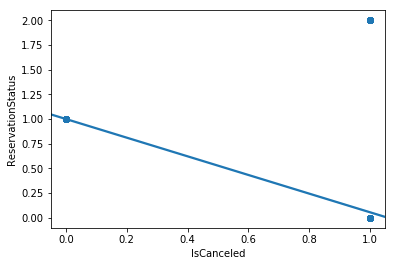

In [20]:
sns.regplot(x='IsCanceled',y='ReservationStatus',data=d2)

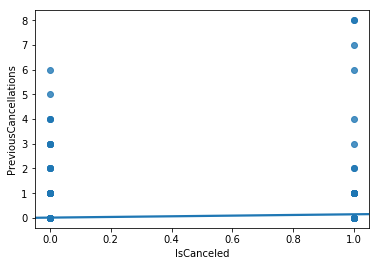

In [21]:
sns.regplot(x='IsCanceled',y='PreviousCancellations',data=d2)

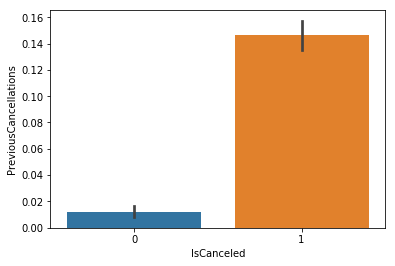

In [22]:
sns.barplot(x=d2['IsCanceled'], y=d2['PreviousCancellations'])

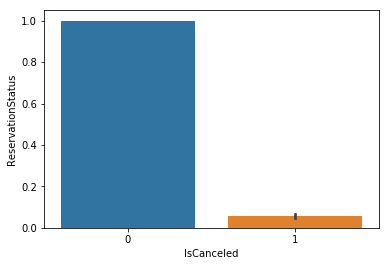

In [23]:
sns.barplot(x=d2['IsCanceled'], y=d2['ReservationStatus'])

In [24]:
from sklearn.linear_model import LinearRegression


In [25]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, random_state=0)

logreg = LogisticRegression().fit(x1_train,y1_train)
logreg

print("Training set score: {:.3f}".format(logreg.score(x1_train,y1_train)))
print("Test set score: {:.3f}".format(logreg.score(x1_test,y1_test)))


c:\users\harsh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.989
Test set score: 0.987


In [26]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.135830
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                12000
Model:                          Logit   Df Residuals:                    11974
Method:                           MLE   Df Model:                           25
Date:                Fri, 26 Jul 2019   Pseudo R-squ.:                  0.8000
Time:                        10:32:22   Log-Likelihood:                -1630.0
converged:                      False   LL-Null:                       -8149.0
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3947      0.499      4.799      0.000       1.417       3.373
x1             0.0013      0.001      2.003      0.045    2.73e-0

c:\users\harsh\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
